In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('final_data.csv')
df.columns

Index(['CITY', 'DISTRICT', 'ADDRESS', 'TALUK', 'PINCODE', 'GENDER',
       'FAMILY_INCOME', 'CET_RANK', 'KEA_CLAIM_CAT', 'ADMIN MODE', 'AdminYear',
       'SSLCTOTMARKS', 'PUCTOTMARKS', 'PUC_INSTITUTE', 'puc_yr_pass',
       'sslc_yr_pass', 'PCM_total', 'PCM %', 'STATE', 'Religion/ Caste'],
      dtype='object')

In [3]:
years =list(df['AdminYear'].unique())

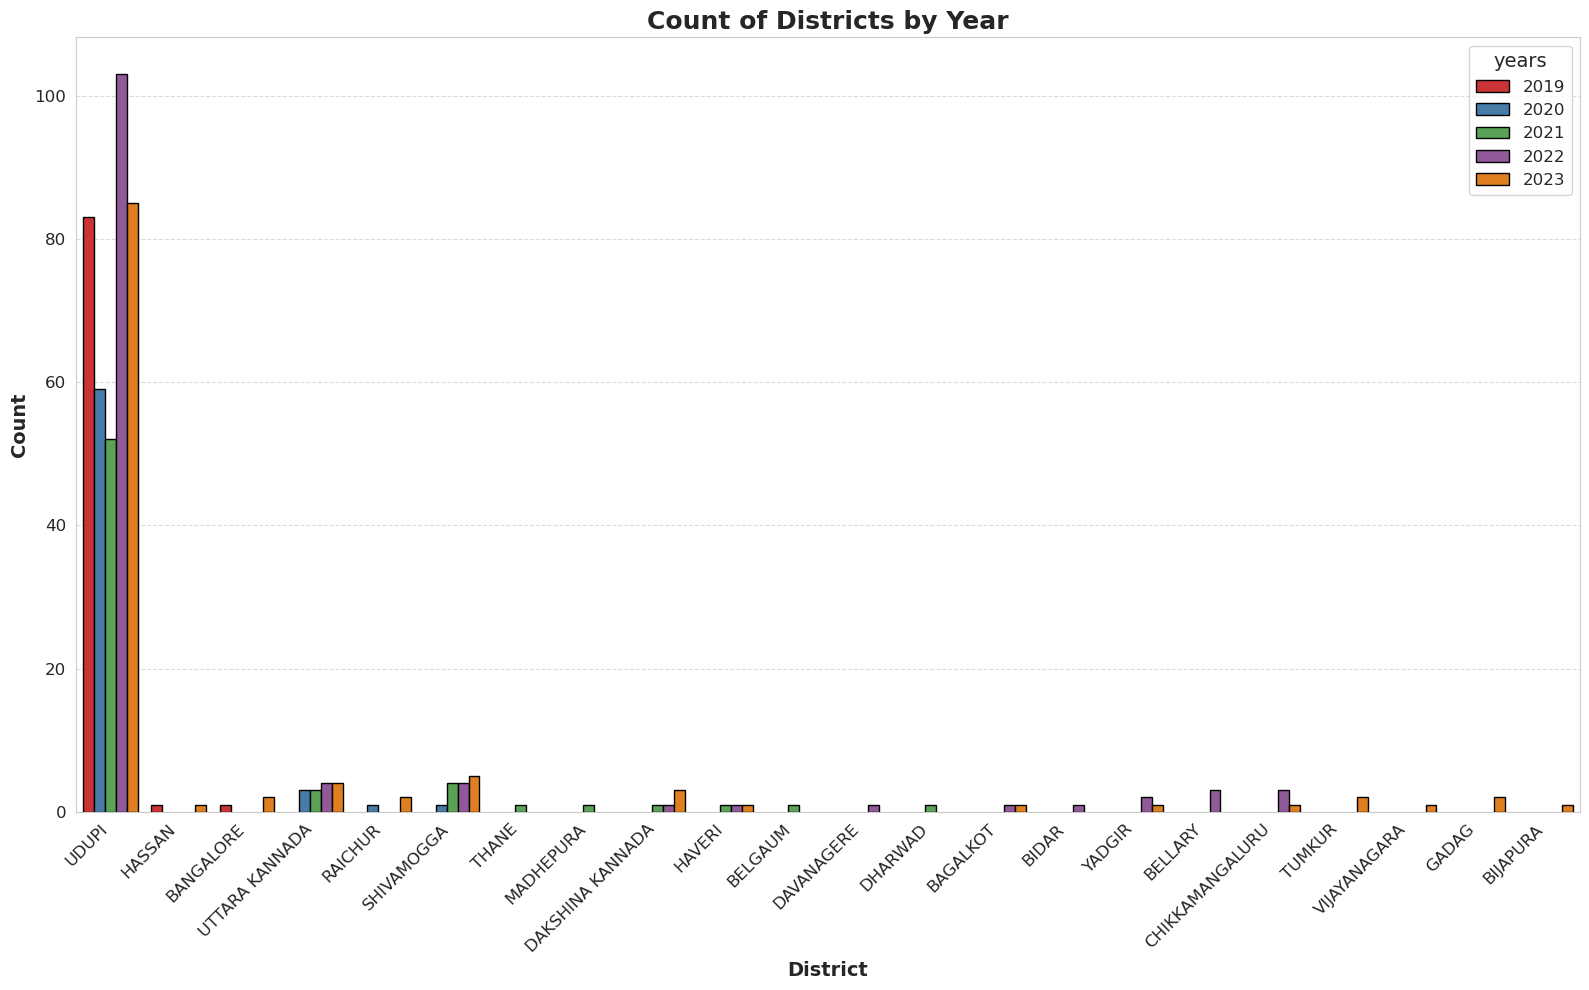

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define categorical columns (if necessary)
categorical_cols = ['DISTRICT']

# Combine all data for the plot
combined_data = df[df['AdminYear'].isin(years)]
# Set the visual aesthetics with Seaborn
sns.set_style('whitegrid')
custom_colors = ['#e41a1c', '#377eb8', '#4daf4a','#984ea3','#ff7f00']
plt.figure(figsize=(16, 10))  # Larger figure size for better visibility and spacing

# Create the countplot with Seaborn
sns.countplot(data=combined_data, x='DISTRICT', hue='AdminYear', palette=custom_colors, edgecolor='black')  # Use edgecolor for better separation
plt.title('Count of Districts by Year', fontsize=18, fontweight='bold')  # Larger and bold title
plt.xlabel('District', fontsize=14, fontweight='bold')  # Larger and bold x-axis label
plt.ylabel('Count', fontsize=14, fontweight='bold')  # Larger and bold y-axis label
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Font size of y-axis ticks
plt.legend(title='years', fontsize=12, title_fontsize='14', loc='upper right')  # Add legend for years with larger font sizes

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent clipping of labels and elements
plt.show()


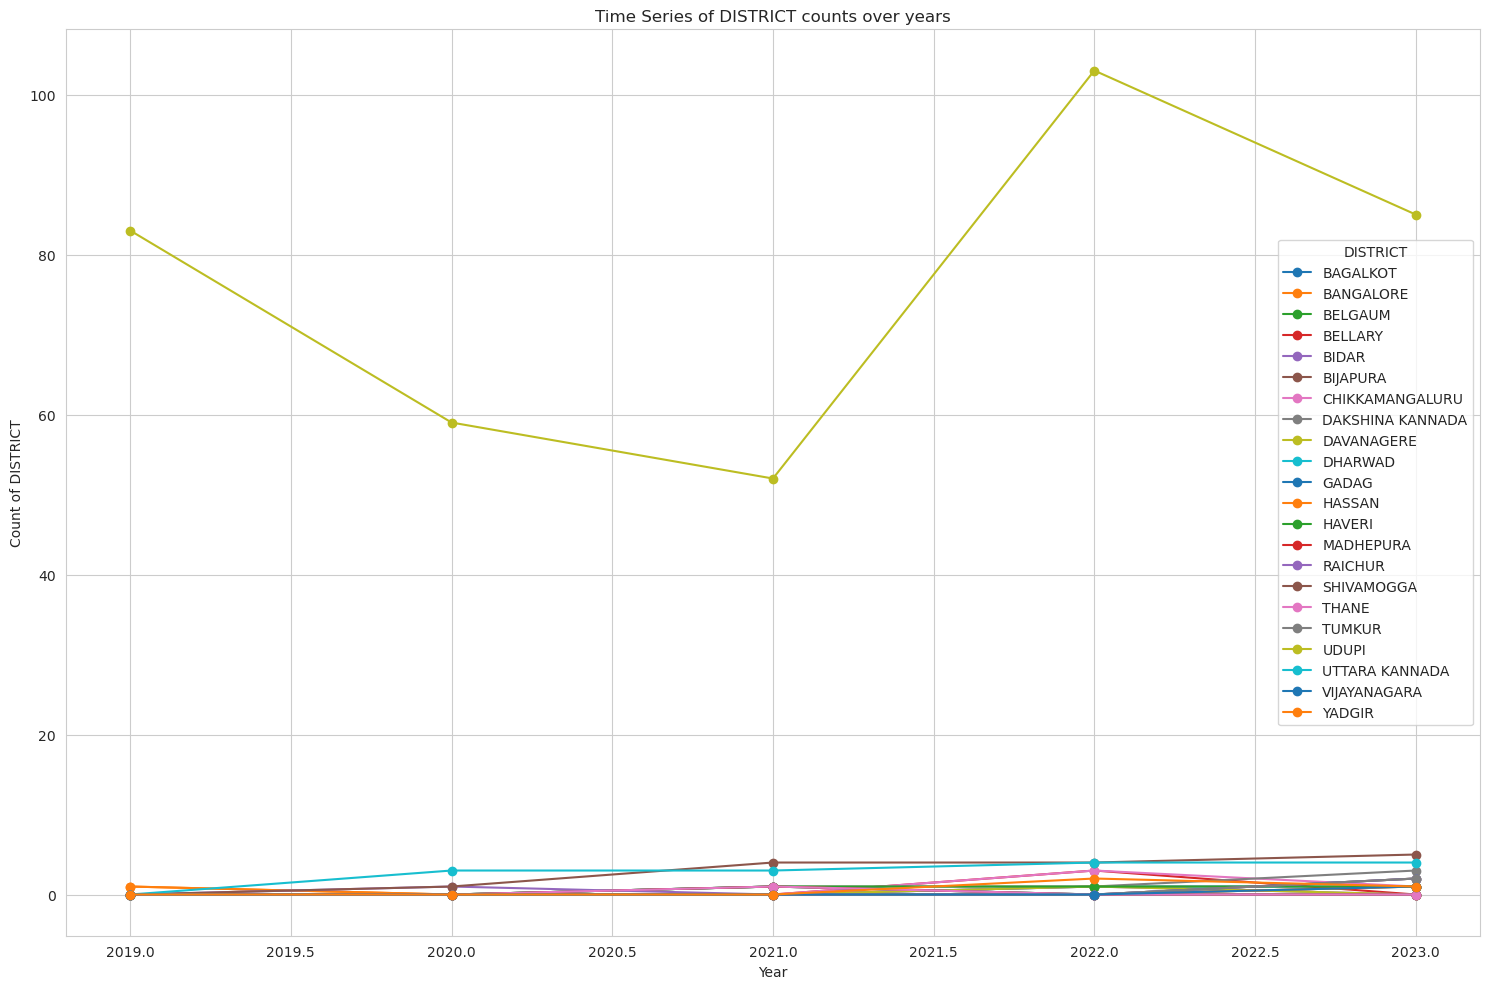

In [4]:
# Set the AdminYear as the index for time series analysis
df.set_index('AdminYear', inplace=True)

# Plot time series for categorical fields DISTRICT and PINCODE
fields_to_plot = ['DISTRICT']

plt.figure(figsize=(15, 10))

for i, field in enumerate(fields_to_plot, 1):
    plt.subplot(len(fields_to_plot), 1, i)
    # Group by AdminYear and field, and count the occurrences
    grouped_data = df.groupby(['AdminYear', field]).size().unstack(fill_value=0)
    # Plot the grouped data
    grouped_data.plot(ax=plt.gca(), marker='o')
    plt.title(f'Time Series of {field} counts over years')
    plt.xlabel('Year')
    plt.ylabel(f'Count of {field}')
    plt.grid(True)
    plt.tight_layout()
plt.show()


In [5]:
# List of PIN codes for Udupi district and nearby districts (Dakshina Kannada, Uttara Kannada, Chikmagalur, and Shivamogga)
pin_codes = [
    #  District
    576101, 576102, 576103, 576104, 576105, 576106, 576107, 576108, 576111,
    576112, 576113, 576114, 576115, 576116, 576117, 576118, 576119, 576120,
    576121, 576122, 576123, 576124, 576125, 576126, 576127, 576128, 576129,
    576210, 576213, 576214, 576215, 576216, 576217, 576218, 576219, 576220,
    576221, 576222, 576223, 576224, 576225, 576226, 576227, 576228, 576229,
    
    # Dakshina Kannada District
    575001, 575002, 575003, 575004, 575005, 575006, 575007, 575008, 575009,
    575010, 575011, 575013, 575014, 575015, 575016, 575017, 575018, 575019,
    574101, 574102, 574103, 574104, 574105, 574106, 574107, 574108, 574109,
    574110, 574111, 574112, 574113, 574114, 574115, 574116, 574117, 574118,
    574119, 574120, 574121, 574122, 574123, 574124, 574125, 574126, 574127,
    574128, 574129, 574130, 574131, 574132, 574133, 574134, 574135, 574136,
    574137, 574138, 574139, 574140, 574141, 574142, 574143, 574144, 574145,
    574146, 574147, 574148, 574149, 574150, 574151, 574152, 574153, 574154,
    
    # Uttara Kannada District
    581301, 581302, 581303, 581304, 581305, 581306, 581307, 581308, 581309,
    581310, 581311, 581312, 581313, 581314, 581315, 581316, 581317, 581318,
    581319, 581320, 581321, 581322, 581323, 581324, 581325, 581326, 581327,
    581328, 581329, 581330, 581331, 581332, 581333, 581334, 581335, 581336,
    581337, 581338, 581339, 581340, 581341, 581342, 581343, 581344, 581345,
    581346, 581347, 581348, 581349, 581350, 581351, 581352, 581353, 581354,
    581355, 581356, 581357, 581358, 581359, 581360, 581361, 581362, 581363,
    581364, 581365, 581366, 581367, 581368, 581369, 581370, 581371, 581372,
    
    # Chikmagalur District
    577101, 577102, 577103, 577104, 577111, 577112, 577113, 577114, 577115,
    577116, 577117, 577118, 577119, 577120, 577121, 577122, 577123, 577124,
    577125, 577126, 577127, 577128, 577129, 577130, 577131, 577132, 577133,
    577134, 577135, 577136, 577137, 577138, 577139, 577140, 577141, 577142,
    577143, 577144, 577145, 577146, 577147, 577148, 577149, 577150, 577151,
    577152, 577153, 577154, 577155, 577156, 577157, 577158, 577159, 577160,
    
    # Shivamogga District
    577201, 577202, 577203, 577204, 577205, 577206, 577207, 577208, 577209,
    577210, 577211, 577212, 577213, 577214, 577215, 577216, 577217, 577218,
    577219, 577220, 577221, 577222, 577223, 577224, 577225, 577226, 577227,
    577228, 577229, 577230, 577231, 577232, 577233, 577234, 577235, 577236,
    577237, 577238, 577239, 577240, 577241, 577242, 577243, 577244, 577245,
    577246, 577247, 577248, 577249, 577250, 577251, 577252, 577253, 577254,
    577255, 577256, 577257, 577258, 577259, 577260, 577261, 577262, 577263,
]

In [6]:
pincode_wise=df[df['PINCODE'].isin(pin_codes)]

<Figure size 2000x1200 with 0 Axes>

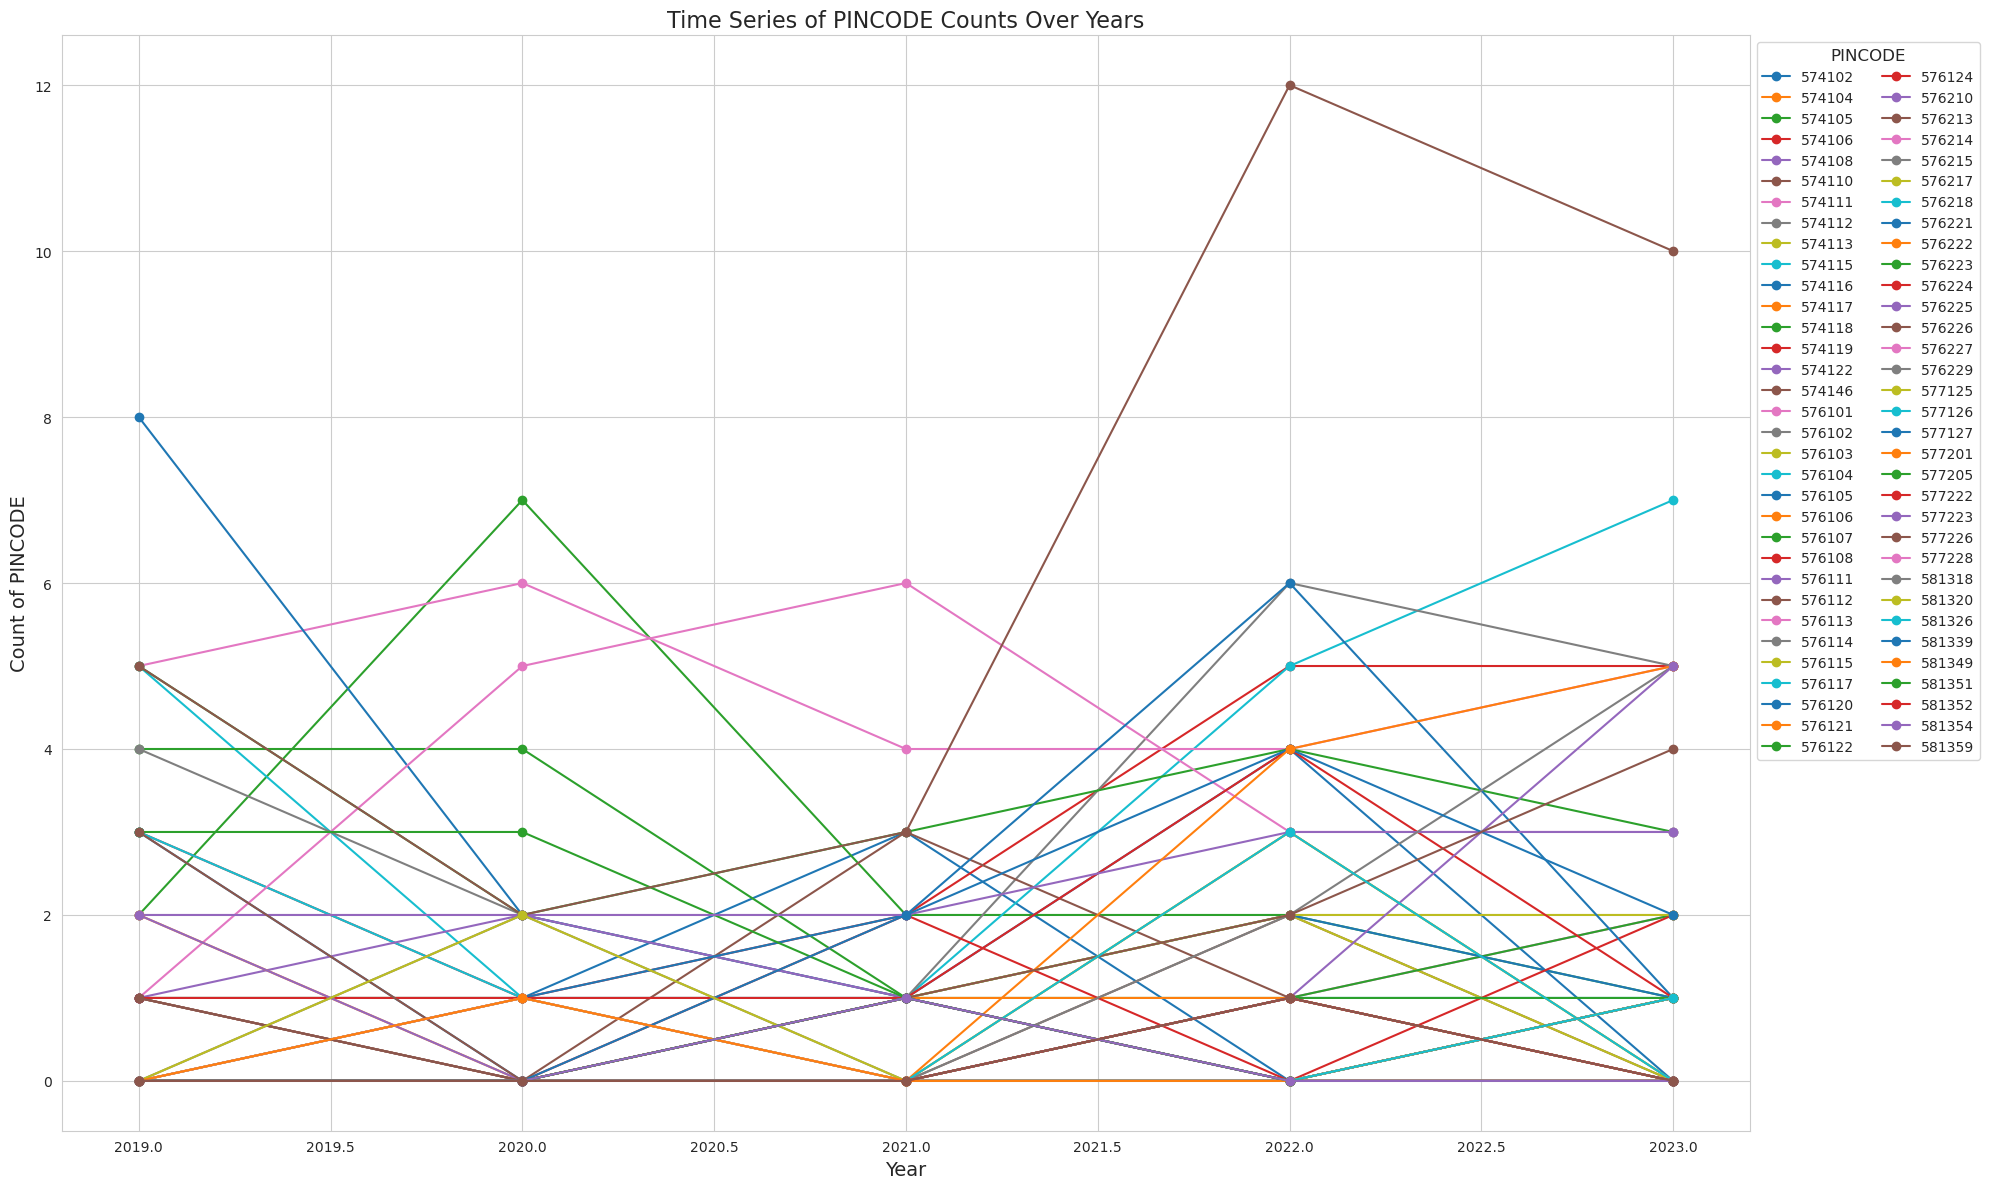

In [7]:
import matplotlib.pyplot as plt

# Assuming df and pin_codes are already defined
field_to_plot = 'PINCODE'
pincode_wise_refined_dataset = df[df['PINCODE'].isin(pin_codes)]

# Increase the figure size
plt.figure(figsize=(20, 12))

# Group by AdminYear and PINCODE, and count the occurrences
grouped_data = pincode_wise_refined_dataset.groupby(['AdminYear', field_to_plot]).size().unstack(fill_value=0)

# Plot the grouped data
grouped_data.plot(marker='o', figsize=(20, 12))

plt.title(f'Time Series of {field_to_plot} Counts Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(f'Count of {field_to_plot}', fontsize=14)
plt.grid(True)

# Customize legend
plt.legend(title=field_to_plot, loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()


In [11]:
# import matplotlib.pyplot as plt

# # Assuming df and pin_codes are already defined
# field_to_plot = 'PINCODE'
# pincode_wise_refined_dataset = df[df['PINCODE'].isin(pin_codes)]

# # Group by AdminYear and PINCODE, and count the occurrences
# grouped_data = pincode_wise_refined_dataset.groupby(['AdminYear', field_to_plot]).size().unstack(fill_value=0)

# # Limit the number of PINCODEs to plot
# num_pincodes_to_plot = 10
# pincodes_to_plot = grouped_data.columns[:num_pincodes_to_plot]

# # Create subplots
# fig, axes = plt.subplots(nrows=num_pincodes_to_plot, ncols=1, figsize=(15, 5 * num_pincodes_to_plot), sharex=True)

# for i, pincode in enumerate(pincodes_to_plot):
#     data = grouped_data[pincode]
#     axes[i].plot(data.index, data.values, marker='o', label=pincode)
#     axes[i].set_title(f'Time Series of {field_to_plot}: {pincode}', fontsize=14)
#     axes[i].set_ylabel('Count', fontsize=12)
#     axes[i].legend(loc='upper left')
#     axes[i].grid(True)

# plt.xlabel('Year', fontsize=14)
# plt.tight_layout()
# plt.show()


In [12]:
print(pincode_wise_refined_dataset)

                 CITY DISTRICT  \
AdminYear                        
2019            UDUPI    UDUPI   
2019            UDUPI    UDUPI   
2019            UDUPI    UDUPI   
2019            UDUPI    UDUPI   
2019            UDUPI    UDUPI   
...               ...      ...   
2023            UDUPI    UDUPI   
2023       BRAHMAVARA    UDUPI   
2023          KARKALA    UDUPI   
2023            UDUPI    UDUPI   
2023            UDUPI    UDUPI   

                                                     ADDRESS      TALUK  \
AdminYear                                                                 
2019       KASHI GARDEN KURKALU VILLAGE POST SUBHASNAGAR ...      UDUPI   
2019       5 - 107 K2 NISARGA VASUKI NAGARA 76 BB BAILOOR...      UDUPI   
2019       SHRI GAJAGOWRI MAHALINGESHWARA TEMPLE VILLAGE ...  BRAHMAVAR   
2019             JNANASUDHA ULIYARU  POST MAJOOR KAPU-574106      UDUPI   
2019       DODDAMANE NEAR VISHWANATH TEMPLE CHANTHAR, AGR...  BRAHMAVAR   
...                             

In [14]:
import plotly.express as px

# Assuming df and pin_codes are already defined
field_to_plot = 'PINCODE'

# Plotly express line plot
fig = px.line(pincode_wise_refined_dataset, x='PINCODE', y='AdminYear', color=field_to_plot,
              title=f'Time Series of {field_to_plot} Counts Over Years')

fig.update_layout(width=1200, height=800)
fig.show()


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['CITY', 'DISTRICT', 'ADDRESS', 'TALUK', 'PINCODE', 'GENDER', 'FAMILY_INCOME', 'CET_RANK', 'KEA_CLAIM_CAT', 'ADMIN MODE', 'SSLCTOTMARKS', 'PUCTOTMARKS', 'PUC_INSTITUTE', 'puc_yr_pass', 'sslc_yr_pass', 'PCM_total', 'PCM %', 'STATE', 'Religion/ Caste'] but received: AdminYear

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX

# Assuming 'df' is your original DataFrame with columns like 'AdminYear', 'DISTRICT', etc.
# Example data aggregation by AdminYear and DISTRICT
df_agg = df.groupby(['AdminYear', 'DISTRICT']).size().reset_index(name='Students Joined')

# Extract endogenous variable (Students Joined)
endog = df_agg['Students Joined']

# Ensure endog is a Series and 1-dimensional
endog = endog.squeeze()

# Create exogenous variables (AdminYear and DISTRICT)
exog = df_agg[['AdminYear', 'DISTRICT']]

# Fit VARMAX model
model = VARMAX(endog, exog=exog, order=(1, 1))  # Example order (p, q)
results = model.fit()

# Make predictions
forecast_steps = 5  # Example: Predict next 5 years
exog_forecast = pd.DataFrame({
    'AdminYear': range(df_agg['AdminYear'].max() + 1, df_agg['AdminYear'].max() + 1 + forecast_steps),
    'DISTRICT': 'UDUPI'  # Example district for forecasting
})
forecast = results.forecast(steps=forecast_steps, exog=exog_forecast)

# Plotting historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df_agg['AdminYear'], df_agg['Students Joined'], label='Historical Data')
plt.plot(exog_forecast['AdminYear'], forecast, label='Forecasted Data')
plt.xlabel('Year')
plt.ylabel('Students Joined')
plt.title('Historical and Forecasted Students Joined')
plt.legend()
plt.grid(True)
plt.show()


/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


IndexError: tuple index out of range